# TASK 2


**IMPORTING THE LIBRARIES:**

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

IMPORT THE DATASET:

In [2]:
#loading the diabetes dataset to pandas Dataframe
dataset = pd.read_csv('diabetes.csv')

In [3]:
#To visualize first five rows of dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#To visualize bottom five rows in dataset
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#total number of rows and columns in dataset
#there are 768 rows and 9 columns
dataset.shape

(768, 9)

In [6]:
#getting the stastics of dataset
dataset.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [7]:
#get whole information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**CORRELATION:**

In [8]:
#getting correlation
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


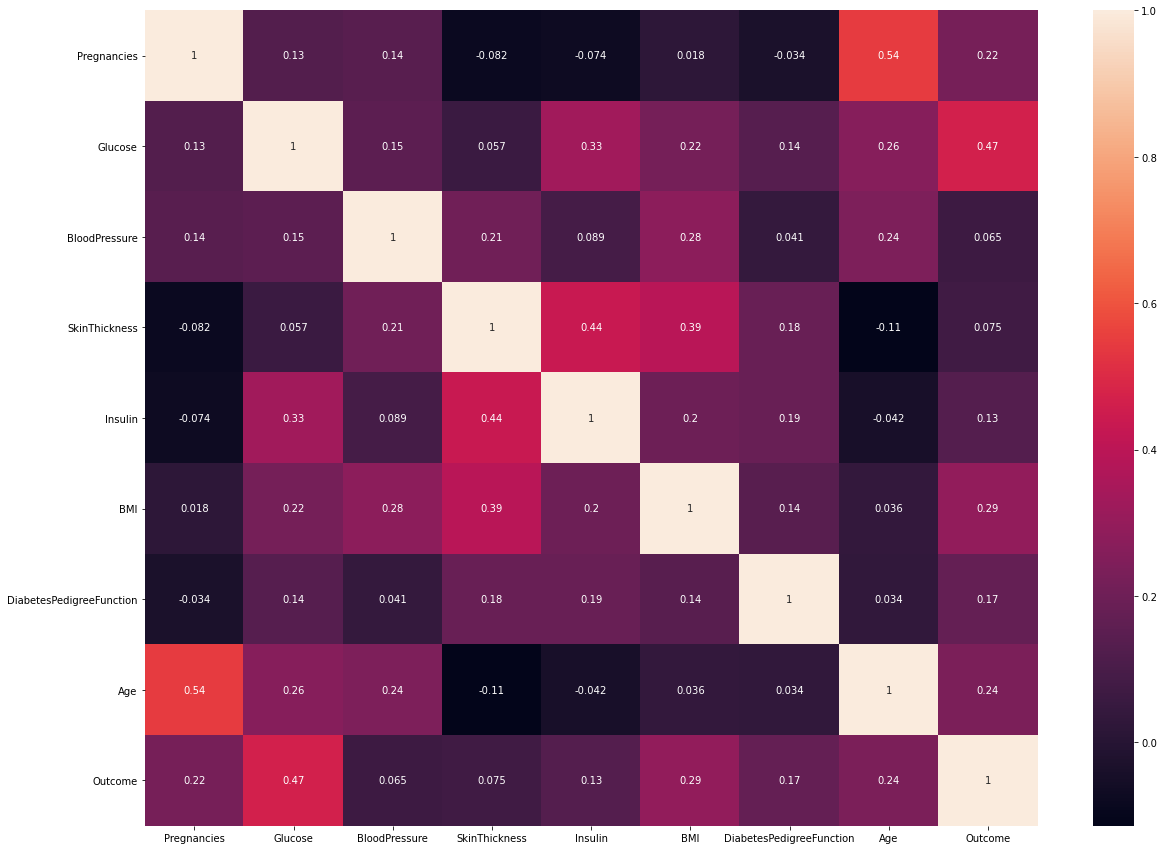

In [16]:
corrmat = dataset.corr()
top_corr = corrmat.index
plt.figure(figsize =(20,15))
p = sns.heatmap(dataset[top_corr].corr(),annot = True)
plt.show()

In [18]:
#check if any null value is present
dataset.isnull().values.any()

False

In [31]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**VISUALIZATION OF DATA:**

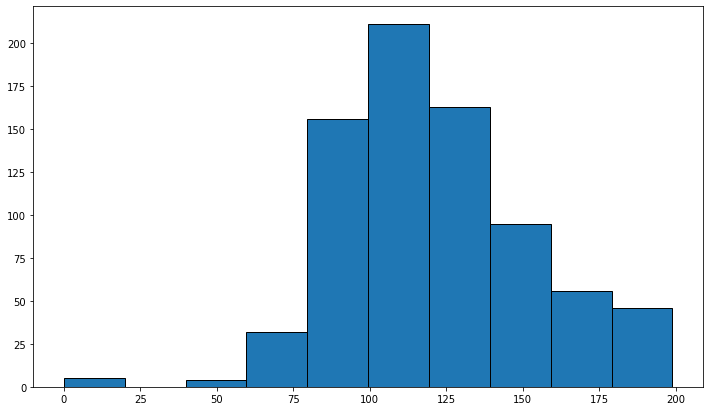

In [58]:
#histplot of glucose
plt.figure(figsize =(12,7))
plt.hist("Glucose",data = dataset,edgecolor ="k")
plt.show()

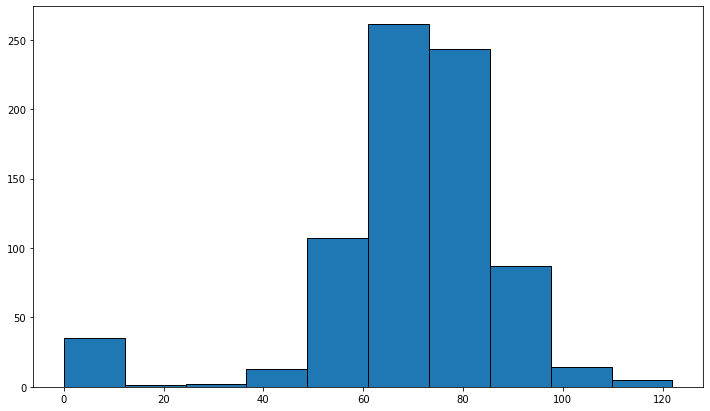

In [59]:
#histplot of Bloodpressure
plt.figure(figsize =(12,7))
plt.hist("BloodPressure",data = dataset,edgecolor ="k")
plt.show()

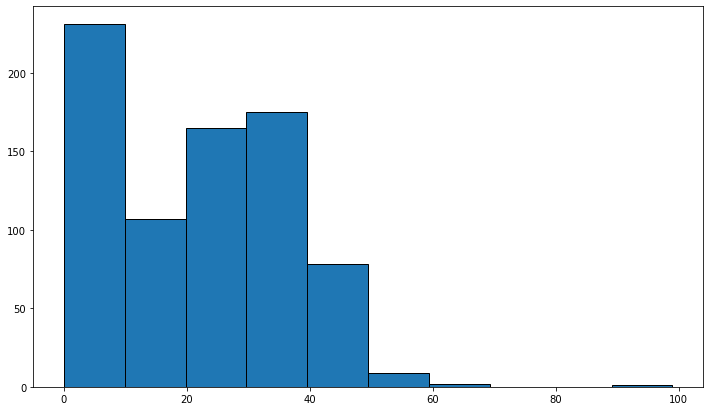

In [60]:
#histplot of Skinthickness
plt.figure(figsize =(12,7))
plt.hist("SkinThickness",data = dataset,edgecolor ="k")
plt.show()

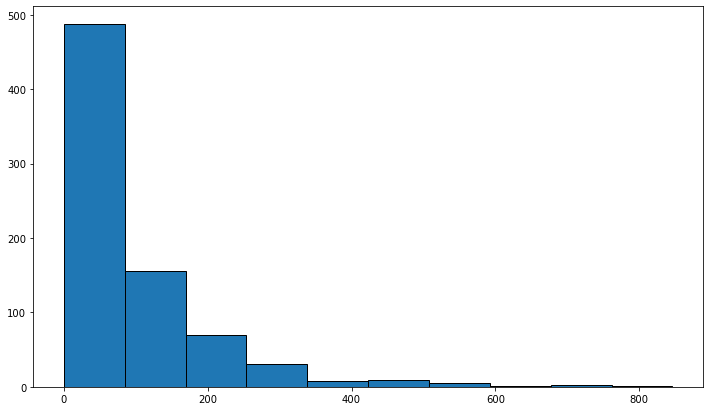

In [61]:
#histplot of Insulin
plt.figure(figsize =(12,7))
plt.hist("Insulin",data = dataset,edgecolor ="k")
plt.show()

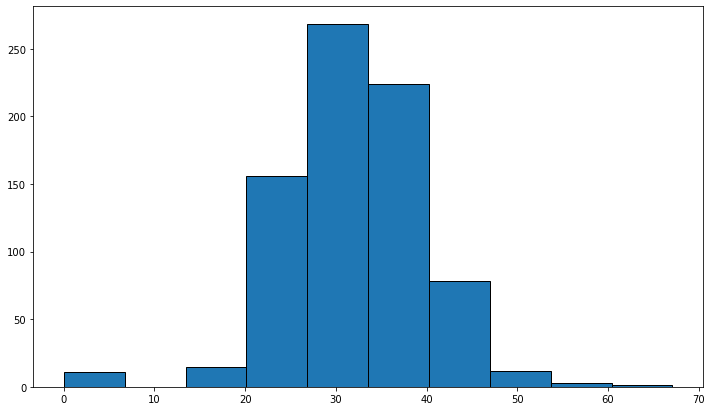

In [62]:
#histplot of BMI
plt.figure(figsize =(12,7))
plt.hist("BMI",data = dataset,edgecolor ="k")
plt.show()

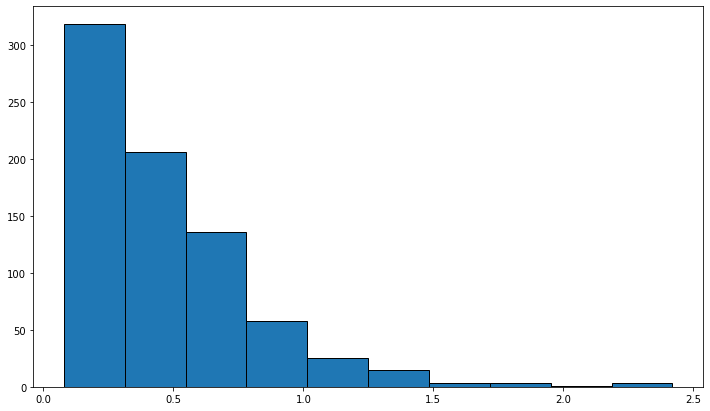

In [63]:
#histplot of DiabetesPedigreeFunction
plt.figure(figsize =(12,7))
plt.hist("DiabetesPedigreeFunction",data = dataset,edgecolor ="k")
plt.show()

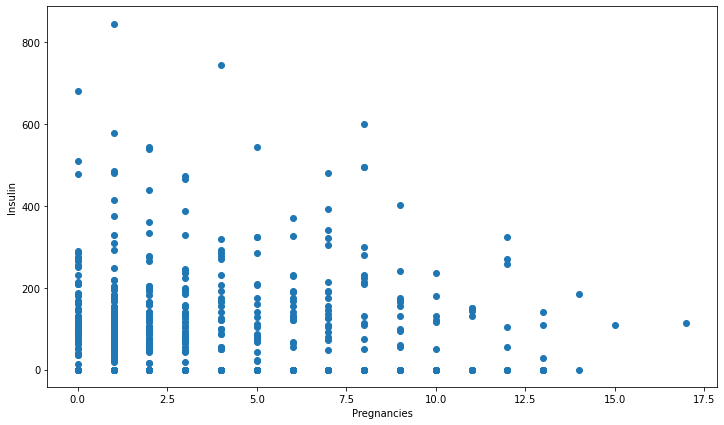

In [68]:
#pregnancies vs insulin
plt.figure(figsize =(12,7))
plt.scatter("Pregnancies","Insulin",data = dataset)
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show()

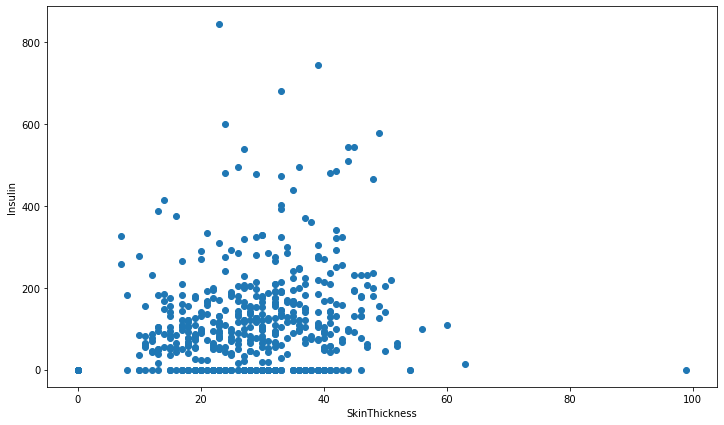

In [69]:
#SkinThickness vs insulin
plt.figure(figsize =(12,7))
plt.scatter("SkinThickness","Insulin",data = dataset)
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()

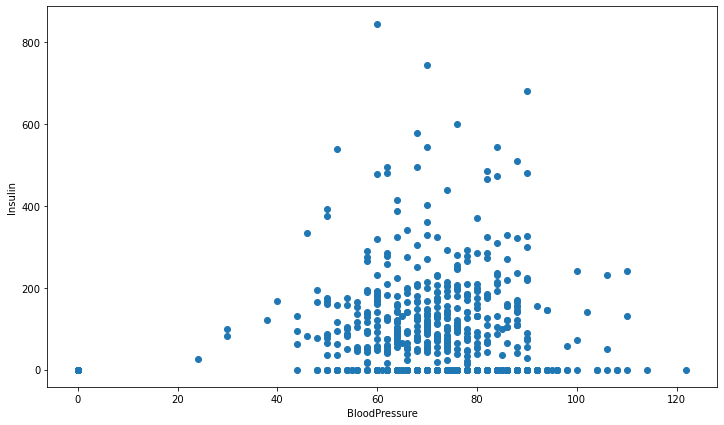

In [70]:
#BloodPressure vs insulin
plt.figure(figsize =(12,7))
plt.scatter("BloodPressure","Insulin",data = dataset)
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show()

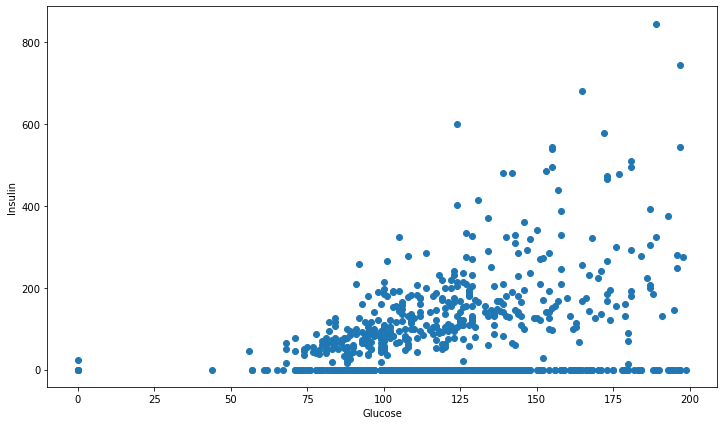

In [71]:
#Glucose vs insulin
plt.figure(figsize =(12,7))
plt.scatter("Glucose","Insulin",data = dataset)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.show()

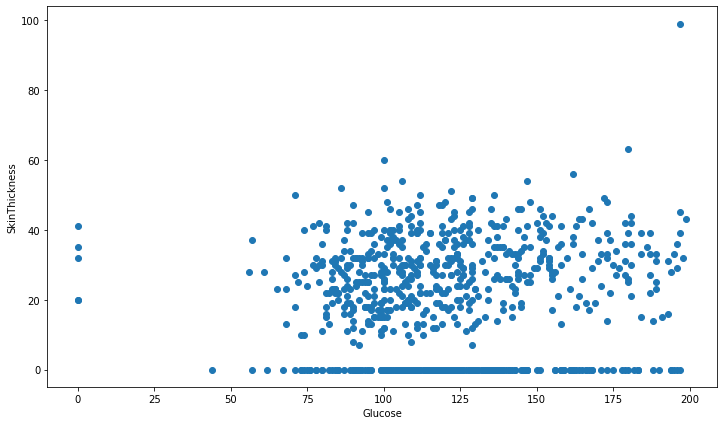

In [72]:
#Glucose vs SkinThickness
plt.figure(figsize =(12,7))
plt.scatter("Glucose","SkinThickness",data = dataset)
plt.xlabel("Glucose")
plt.ylabel("SkinThickness")
plt.show()

 **DATA CLEANING:**

In [73]:
dataset["SkinThickness"] = dataset["SkinThickness"].replace(0, dataset["SkinThickness"].mean())

In [74]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


In [75]:
dataset["Insulin"] = dataset["Insulin"].replace(0, dataset["Insulin"].mean())

In [76]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


**DATA SPLITTING:**

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
x = dataset.drop(["Outcome"], axis = 1)
y = dataset["Outcome"]

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [93]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29.000000,126.000000,35.2,0.692,54
118,4,97,60,23.000000,79.799479,28.2,0.443,22
247,0,165,90,33.000000,680.000000,52.3,0.427,23
157,1,109,56,21.000000,135.000000,25.2,0.833,23
468,8,120,0,20.536458,79.799479,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
192,7,159,66,20.536458,79.799479,30.4,0.383,36
629,4,94,65,22.000000,79.799479,24.7,0.148,21
559,11,85,74,20.536458,79.799479,30.1,0.300,35


In [94]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [95]:
x_train.shape

(614, 8)

In [96]:
y_train.shape

(614,)

In [101]:
x_test.shape

(154, 8)

In [102]:
y_test.shape

(154,)

**LOGISTIC REGRESSION:**

In [103]:
from sklearn.linear_model import LogisticRegression

In [108]:
logReg = LogisticRegression()

In [109]:
logReg.fit(x_train, y_train)

C:\python.c\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
logReg.score(x_test , y_test)

0.7987012987012987

In [111]:
from sklearn.metrics import confusion_matrix, classification_report

In [112]:
predictions = logReg.predict(x_test)

In [113]:
cm = confusion_matrix(y_test,predictions)

In [114]:
cm

array([[95, 12],
       [19, 28]], dtype=int64)

<AxesSubplot:>

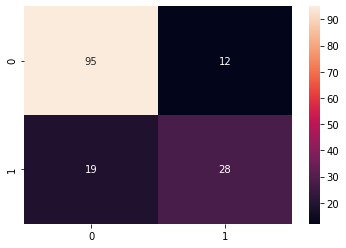

In [115]:
sns.heatmap(cm , annot=True)

In [141]:
print(f'classification report is: {classification_report(y_test, predictions)}')
print(f'confusion matrix is:{confusion_matrix(y_test, predictions)}')
print(f'accuracy score is:{accuracy_score(y_test, predictions)}')

classification report is:               precision    recall  f1-score   support

           0       0.85      0.85      0.85       107
           1       0.66      0.66      0.66        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154

confusion matrix is:[[91 16]
 [16 31]]
accuracy score is:0.7922077922077922


**RANDOM FOREST CLASSIFIER:**

In [119]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state = 10)
random_forest_model.fit(x_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [122]:
random_forest_model.score(x_test , y_test)

0.7922077922077922

In [147]:
from sklearn.metrics import confusion_matrix, classification_report

In [124]:
predictions = random_forest_model.predict(x_test)

In [125]:
cm = confusion_matrix(y_test,predictions)

In [126]:
cm

array([[91, 16],
       [16, 31]], dtype=int64)

<AxesSubplot:>

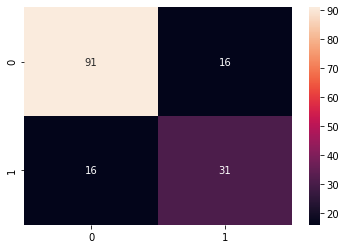

In [127]:
sns.heatmap(cm, annot = True)

In [140]:
print(f'classification report is: {classification_report(y_test, predictions)}')
print(f'confusion matrix is:{confusion_matrix(y_test, predictions)}')
print(f'accuracy score is:{accuracy_score(y_test, predictions)}')

classification report is:               precision    recall  f1-score   support

           0       0.85      0.85      0.85       107
           1       0.66      0.66      0.66        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154

confusion matrix is:[[91 16]
 [16 31]]
accuracy score is:0.7922077922077922


**NAIVE BAYES:**

In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
clf = GaussianNB()

In [145]:
clf.fit(x_train,y_train)

GaussianNB()

In [146]:
clf.score(x_test , y_test)

0.7727272727272727

In [148]:
from sklearn.metrics import confusion_matrix, classification_report

In [149]:
predictions = clf.predict(x_test)

In [150]:
cm = confusion_matrix(y_test,predictions)

In [151]:
cm

array([[91, 16],
       [19, 28]], dtype=int64)

<AxesSubplot:>

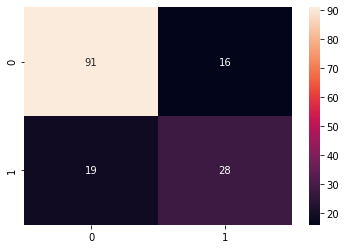

In [152]:
sns.heatmap(cm, annot = True)

In [153]:
print(f'classification report is: {classification_report(y_test, predictions)}')
print(f'confusion matrix is:{confusion_matrix(y_test, predictions)}')
print(f'accuracy score is:{accuracy_score(y_test, predictions)}')

classification report is:               precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.64      0.60      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154

confusion matrix is:[[91 16]
 [19 28]]
accuracy score is:0.7727272727272727
